In [ ]:
# %matplotlib ipympl
import scripts.init_gpu as init_gpu
init_gpu.initialize_gpus()

2024-12-03 11:01:28.723721: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-03 11:01:28.731134: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733184088.739455  350066 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733184088.741972  350066 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 11:01:28.750728: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Num GPUs Available:  2


In [2]:
import pandas as pd

df = pd.read_csv('../dataset/processed/Locations.csv')
df.head()

,Location,Website,0,1,2,3,4,5,6,7,...,116,117,118,119,120,121,122,123,124,125
0,LOC1,0,88,-64,94,62,33,33,-33,-268,...,0,0,0,0,0,0,0,0,0,0
1,LOC1,0,88,94,62,33,-64,33,-33,-268,...,0,0,0,0,0,0,0,0,0,0
2,LOC1,0,88,94,-64,62,33,33,-33,-37,...,0,0,0,0,0,0,0,0,0,0
3,LOC1,0,-64,88,94,62,33,33,-33,-273,...,0,0,0,0,0,0,0,0,0,0
4,LOC1,0,88,94,62,-64,33,33,-33,-37,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.describe()

,Website,0,1,2,3,4,5,6,7,8,...,116,117,118,119,120,121,122,123,124,125
count,917171.000000,917171.000000,917171.000000,917171.000000,917171.000000,917171.000000,917171.000000,917171.000000,917171.000000,917171.000000,...,917171.000000,917171.000000,917171.000000,917171.000000,917171.000000,917171.000000,917171.000000,917171.000000,917171.000000,917171.000000
mean,732.632296,11.697534,41.908742,54.936967,56.328872,24.227216,33.520433,-23.276070,-148.958588,-105.517827,...,-2.297191,-8.737232,-5.499883,-4.181469,-4.442975,-2.300365,-8.439402,-4.805703,-3.778397,-4.037225
std,432.491397,69.647873,66.779700,60.288747,28.142184,42.352232,16.337748,30.697312,135.765224,108.661586,...,41.337851,54.538385,45.200837,44.705727,47.907823,40.313256,54.101779,43.752375,43.791264,46.922613
min,0.000000,-350.000000,-336.000000,-302.000000,-344.000000,-478.000000,-355.000000,-528.000000,-597.000000,-615.000000,...,-495.000000,-593.000000,-501.000000,-581.000000,-570.000000,-581.000000,-622.000000,-581.000000,-604.000000,-587.000000
25%,357.000000,-64.000000,-40.000000,59.000000,56.000000,33.000000,33.000000,-33.000000,-276.000000,-207.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,723.000000,-1.000000,88.000000,94.000000,63.000000,33.000000,33.000000,-33.000000,-37.000000,-33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1105.000000,88.000000,88.000000,94.000000,70.000000,33.000000,33.000000,-33.000000,-37.000000,-33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1499.000000,88.000000,94.000000,107.000000,123.000000,123.000000,94.000000,94.000000,123.000000,99.000000,...,127.000000,146.000000,126.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000


In [4]:
locations = df['Location'].unique()


In [29]:
df.Location.value_counts()

Location
LOC1    430696
LOC2    331527
LOC3    154948
Name: count, dtype: int64

# Standardizing Dataset

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric)
df_scaled = df.copy()
df_scaled.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])

/tmp/ipykernel_1799927/2192231212.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.09554684  1.09554684  1.09554684 ... -1.08686126 -1.08686126
 -1.08686126]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
/tmp/ipykernel_1799927/2192231212.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.58594303  0.78004672  0.78004672 ...  0.69019901  0.69019901
  0.69019901]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
/tmp/ipykernel_1799927/2192231212.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.64793276  0.11715349 -1.97278993 ...  0.64793276  0.64793276
 

# Means, Std of Same Website, Different Locations

In [6]:
def get_aggr_stats(df):
    gp = df.groupby(['Location', 'Website'])
    # LOC1, LOC2 216 minimum number of samples
    # LOC3 some have only 99 samples

    return gp.mean(), gp.median(), gp.std()

means, medians, stds = get_aggr_stats(df_scaled)

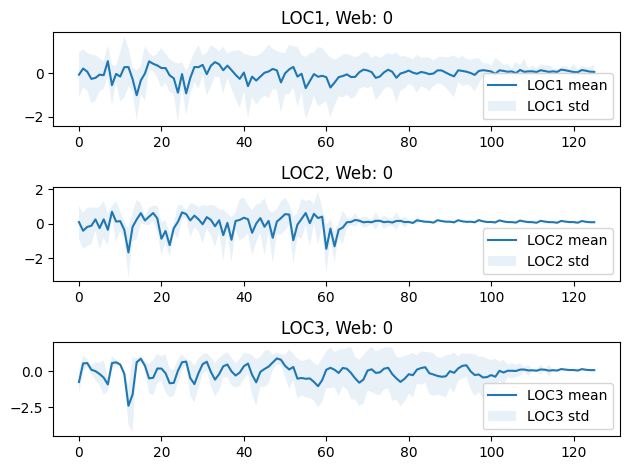

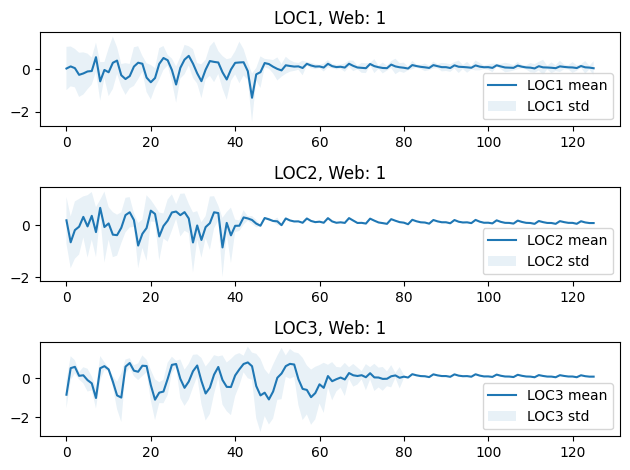

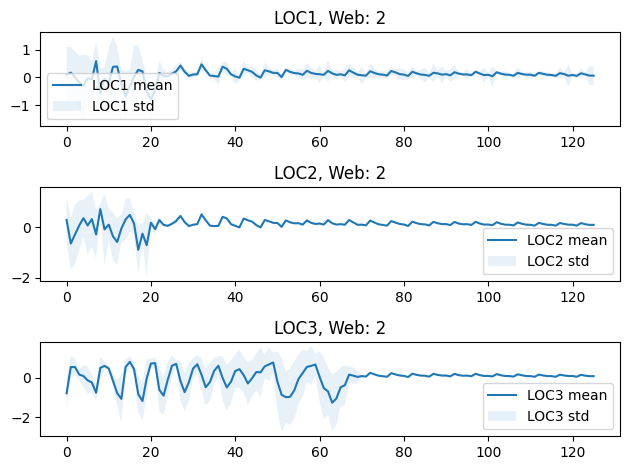

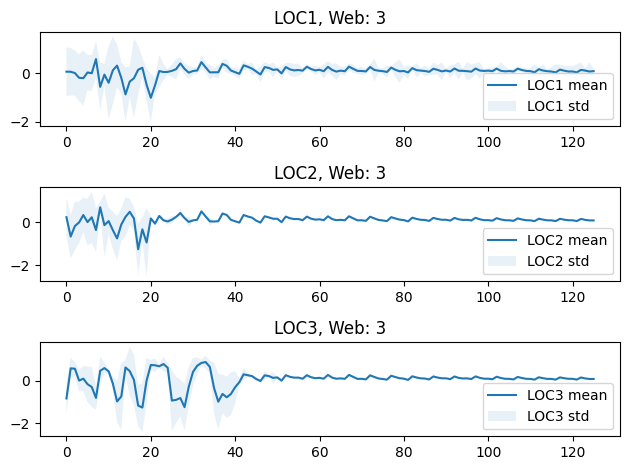

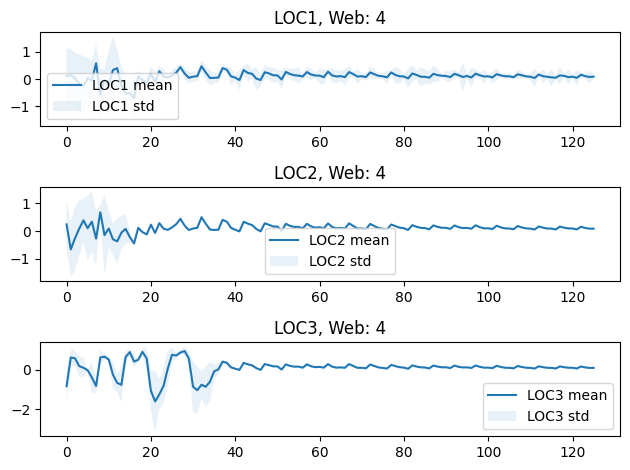

In [43]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    subplot_index = 1
    for location in locations:
        plt.subplot(3, 1, subplot_index)
        subplot_index += 1
        plt.plot(means.loc[location, i].values, label=f'{location} mean')
        plt.fill_between(range(0, 126, 1), means.loc[location, i] - stds.loc[location, i], means.loc[location, i] + stds.loc[location,i], label=f'{location} std', alpha=0.1)
        plt.legend()
        plt.title(f"{location}, Web: {i}")
    plt.tight_layout()
    plt.show()
            

# Dimensionality Reduction and Visualization

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embedding = pca.fit_transform(df_scaled.iloc[:, 2:])

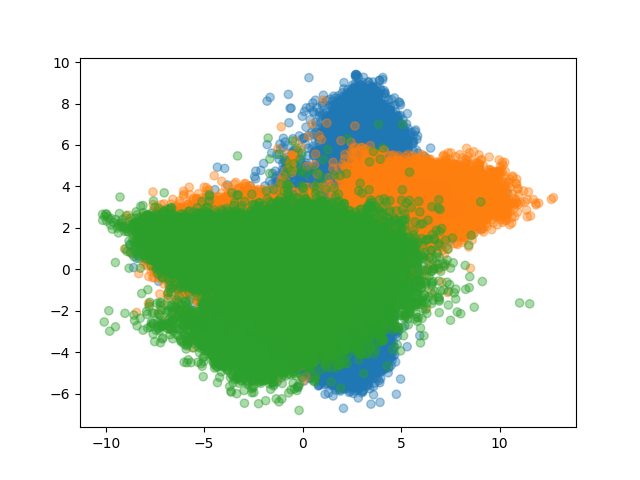

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.Location.map({locations[i]:i for i in range(len(locations))})],
    alpha=0.4
)
plt.show()

# Location Classification

In [14]:
import random
random_seed = 42

def get_sample(df: pd.DataFrame, train_locations: list[str], all_websites: list[int], num_websites: int = 80) -> tuple[pd.DataFrame, pd.DataFrame, list[int], list[int]]:
    random.seed(random_seed)
    train_web_samples = random.sample(all_websites, num_websites)
    test_web_samples = list(set(all_websites) - set(train_web_samples))

    print(f"Training Websites: {train_web_samples}")
    print(f"Training Locations: {train_locations}")

    train_df = df[df["Location"].isin(
        train_locations) & df["Website"].isin(train_web_samples)]
    train_df.sort_values(by=["Location"], inplace=True)
    train_df.reset_index(drop=True, inplace=True)

    test_df = df[df["Location"].isin(train_locations) & (df["Website"].isin(
        test_web_samples))]

    return train_df, test_df, train_web_samples, test_web_samples


train_df, test_df, train_web_samples, test_web_samples = get_sample(df_scaled, locations, range(1500), 1000)


Training Websites: [1309, 228, 51, 563, 501, 457, 285, 209, 1385, 1116, 178, 1209, 864, 65, 61, 191, 447, 476, 1034, 1232, 54, 1149, 407, 1466, 1330, 1436, 1490, 859, 451, 919, 1206, 569, 13, 326, 1429, 865, 696, 1468, 318, 440, 689, 1492, 189, 778, 198, 735, 704, 1236, 541, 88, 940, 1098, 255, 775, 161, 1130, 600, 1287, 1266, 740, 1182, 393, 142, 93, 1354, 466, 592, 163, 1482, 206, 1456, 1462, 928, 1301, 747, 333, 758, 727, 429, 1372, 546, 1399, 1327, 146, 1247, 1300, 350, 1093, 1495, 334, 946, 777, 552, 1310, 1140, 449, 1402, 664, 114, 469, 1486, 646, 821, 548, 135, 432, 1161, 644, 435, 1342, 1022, 810, 1316, 939, 292, 542, 1493, 505, 1478, 1103, 538, 1197, 877, 1195, 817, 741, 1404, 283, 1043, 1010, 186, 96, 224, 313, 1285, 327, 1487, 1221, 130, 788, 781, 1220, 958, 1083, 514, 1133, 23, 234, 1099, 1419, 1312, 1463, 1498, 601, 890, 323, 929, 6, 539, 1025, 365, 1039, 217, 1280, 611, 1308, 1338, 1415, 1477, 1366, 765, 330, 1104, 1086, 1, 1226, 663, 1000, 39, 229, 743, 629, 490, 118, 49

/tmp/ipykernel_1799927/842304752.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.sort_values(by=["Location"], inplace=True)


In [15]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def preprocess_data(train_df: pd.DataFrame, test_df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, LabelEncoder]:
    le = LabelEncoder()


    X_train = train_df.iloc[:, 2:]
    X_test = test_df.iloc[:, 2:]

    y_train = le.fit_transform(train_df['Location'])
    y_test = le.transform(test_df['Location'])

    return (X_train, X_test, y_train, y_test, le)

X_train, X_test, y_train, y_test, le = preprocess_data(train_df, test_df)

['LOC1' 'LOC2' 'LOC3']


In [24]:
from sklearn import metrics
def evaluate_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    precision = metrics.precision_score(
        y_test, y_pred, average='macro', zero_division=0)
    recall = metrics.recall_score(
        y_test, y_pred, average='macro', zero_division=0)
    return accuracy, precision, recall, confusion_matrix


Accuracy: 91.56


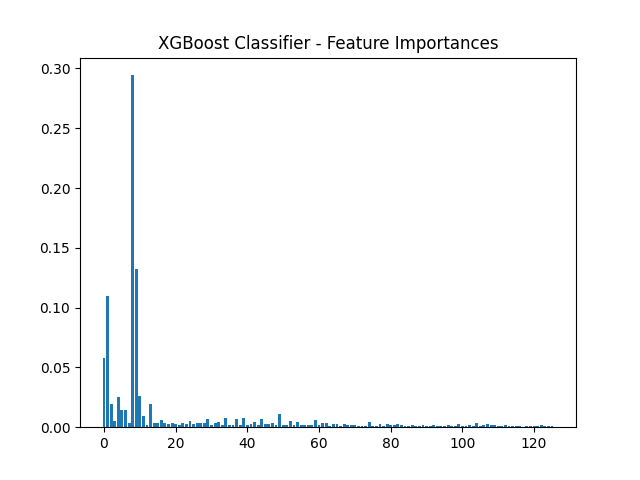

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

model = XGBClassifier()
accuracy, precision, recall, confusion_matrix = evaluate_model(X_train, y_train, X_test, y_test, model)
print(f"Accuracy: {accuracy * 100.0:.2f}, Precision: {precision * 100.0:.2f}, Recall: {recall * 100.0:.2f}")

plt.figure()
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.title("XGBoost Classifier - Feature Importances")
plt.show()

In [30]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)
accuracy, precision, recall, confusion_matrix = evaluate_model(X_train, y_train, X_test, y_test, model)
print(f"Accuracy: {accuracy * 100.0:.2f}, Precision: {precision * 100.0:.2f}, Recall: {recall * 100.0:.2f}")

Accuracy: 85.91, Precision: 87.29, Recall: 86.57


# Website Classification

In [76]:
import pandas as pd
import numpy as np
train_location = 'LOC1'
test_location = 'LOC2'


# Need to undersample, as some websites have 306 samples while other have less. (LOC3 has 99 for some websites, LOC2 had a minimum of 216)

def undersample(df, sample_size=200):
    # Group the DataFrame by "Location"
    grouped_df = df.groupby(["Location", "Website"])

    # Randomly sample a specified number of rows from each group
    undersampled_df = grouped_df.apply(lambda x: x.sample(min(sample_size, len(x)))).reset_index(drop=True)

    return undersampled_df

# Assuming you have a DataFrame named df
# df_balanced = undersample(df_scaled[(df_scaled['Location'].isin([train_location, test_location]))], sample_size=200)

# df_balanced.head()

In [50]:
df_balanced.to_csv("../dataset/processed/LOC1-LOC2-scaled-balanced.csv")

In [45]:
df_balanced.info()
# number of entries = number of locations * number of websites * number of samples per website
# number of entries = 2 * 1500 * 200 =60000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Columns: 128 entries, Location to 125
dtypes: float64(126), int64(1), object(1)
memory usage: 585.9+ MB


In [47]:
from sklearn.neighbors import KNeighborsClassifier


def preprocess_for_web_classification(df, train_location, test_location):
    le = LabelEncoder()
    X_train = df[df['Location'] == train_location].drop(['Location', 'Website'], axis=1)
    X_test = df[df['Location'] == test_location].drop(['Location', 'Website'], axis=1)
    y_train = df[df['Location'] == train_location]['Website']
    y_test = df[df['Location'] == test_location]['Website']

    y_test = le.fit_transform(y_test)
    y_train = le.fit_transform(y_train)

    return X_train, y_train, X_test, y_test, le


print(f"Train: {train_location}, Test: {test_location}")
X_train, y_train, X_test, y_test, le = preprocess_for_web_classification(df_balanced, train_location, test_location)



model = KNeighborsClassifier(n_neighbors=10)
accuracy, precision, recall, confusion_matrix = evaluate_model(X_train, y_train, X_test, y_test, model)
print(f"Accuracy: {accuracy * 100.0:.2f}, Precision: {precision * 100.0:.2f}, Recall: {recall * 100.0:.2f}")

Train: LOC1, Test: LOC2
Accuracy: 20.69, Precision: 24.67, Recall: 20.69


In [48]:
model = XGBClassifier()
accuracy, precision, recall, confusion_matrix = evaluate_model(X_train, y_train, X_test, y_test, model)
print(f"Accuracy: {accuracy * 100.0:.2f}, Precision: {precision * 100.0:.2f}, Recall: {recall * 100.0:.2f}")

Accuracy: 8.88, Precision: 6.22, Recall: 8.88


# How date and ID effects the DoH trace

In [1]:
import pandas as pd

df = pd.read_csv('../dataset/processed/LOC2-LOC3-Date-ID.csv')
df.head()


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:, 4:] = df.iloc[:, 4:].apply(pd.to_numeric)
df.iloc[:, 4:] = scaler.fit_transform(df.iloc[:, 4:])

/tmp/ipykernel_353571/2471771283.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.22916735  1.22916735 -0.07134239 ... -0.99192794 -0.99192794
 -0.99192794]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 4:] = scaler.fit_transform(df.iloc[:, 4:])
/tmp/ipykernel_353571/2471771283.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.3795717  -1.3795717  -0.92016324 ...  0.80261848  0.80261848
  0.80261848]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 4:] = scaler.fit_transform(df.iloc[:, 4:])
/tmp/ipykernel_353571/2471771283.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.61908052  0.61908052 -1.68094567 ...  0.61908052  0.61908052
  0.61908052]' 

In [2]:
df['Date'].sort_values().unique()

array(['2018-10-18', '2018-10-19', '2018-10-20', '2018-10-21',
       '2018-10-22', '2018-10-23', '2018-10-24', '2018-10-25',
       '2018-10-26', '2018-10-27', '2018-10-28', '2018-10-29',
       '2018-10-30', '2018-10-31', '2018-11-01', '2018-11-02',
       '2018-11-03', '2018-11-04', '2018-11-05', '2018-11-06',
       '2018-11-21', '2018-11-22', '2018-11-23', '2018-11-24',
       '2018-11-25'], dtype=object)

In [3]:
len(df[df['Location'] == 'LOC2'].Website.unique())

1500

In [7]:
import pandas as pd
import numpy as np

# Filter the DataFrame for 'LOC2'
loc_data = df[df['Location'] == 'LOC3']

# Randomly select a website
random_website = np.random.choice(loc_data['Website'].unique())
print(f"Selected Website: {random_website}")

# Filter data for the selected website
website_data = loc_data[loc_data['Website'] == random_website]
website_data.Date.unique()

Selected Website: 1312


array(['2018-11-24', '2018-11-23', '2018-11-21', '2018-11-25',
       '2018-11-22'], dtype=object)

### Different Time Frames

No data available in the specified time range


/tmp/ipykernel_353571/3308897607.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
/tmp/ipykernel_353571/3308897607.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


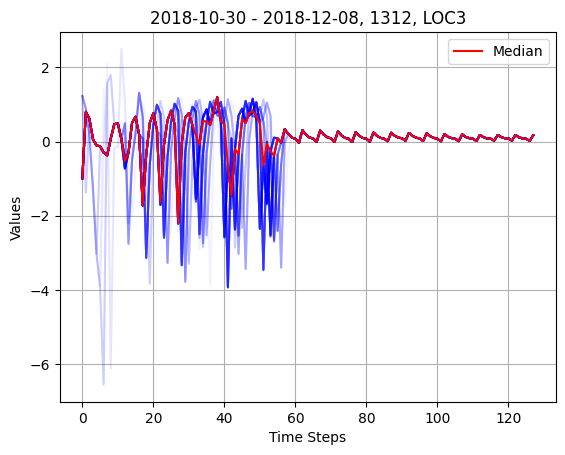

No data available in the specified time range
No data available in the specified time range
No data available in the specified time range
No data available in the specified time range
No data available in the specified time range


/tmp/ipykernel_353571/3308897607.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
/tmp/ipykernel_353571/3308897607.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
/tmp/ipykernel_353571/3308897607.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_time_frame(df: pd.DataFrame, start_date: str, end_date: str):
    """
    Filters data in the specified time frame and plots time series data.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame containing the data.
    start_date (str): Start date of the time frame (format: 'YYYY-MM-DD').
    end_date (str): End date of the time frame (format: 'YYYY-MM-DD').

    Returns:
    pd.DataFrame: Filtered DataFrame for the specified time frame.
    """
    # Ensure the Date column is in datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Filter the DataFrame for the specified time frame
    time_frame_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()
    time_frame_data.reset_index(drop=True, inplace=True)

    if time_frame_data.empty:
        print('No data available in the specified time range')
        return time_frame_data

    # Plot individual time series
    for i in range(len(time_frame_data)):
        plt.plot(time_frame_data.iloc[i, 4:].values, color='blue', alpha=0.05)
        
    # Plot the median of the series
    plt.plot(time_frame_data.iloc[:, 4:].median().to_numpy(), color='red', label='Median')
    
    plt.title(f"{start_date} - {end_date}, {time_frame_data['Website'].iloc[0]}, {time_frame_data['Location'].iloc[0]}")
    plt.xlabel('Time Steps')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.show()

    return time_frame_data


plot_time_frame(website_data,"2018-10-18", "2018-10-30")
plot_time_frame(website_data,"2018-10-30", "2018-12-08")
plot_time_frame(website_data,"2018-08-30", "2018-09-14")
plot_time_frame(website_data,"2018-09-14", "2018-09-28")
plot_time_frame(website_data,"2018-09-28", "2018-10-12")
plot_time_frame(website_data,"2018-10-12", "2018-10-30")
sample_time_frame_df = plot_time_frame(website_data,"2018-10-30", "2018-11-08")


### Different Machines

In [8]:
df.ID.unique()

array([ 2, 17,  5,  7, 13, 15, 21,  0,  6,  1,  4,  3, 16, 12, 23, 18, 14,
       10, 11,  9,  8, 20, 19, 22])

/tmp/ipykernel_353571/3579863777.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


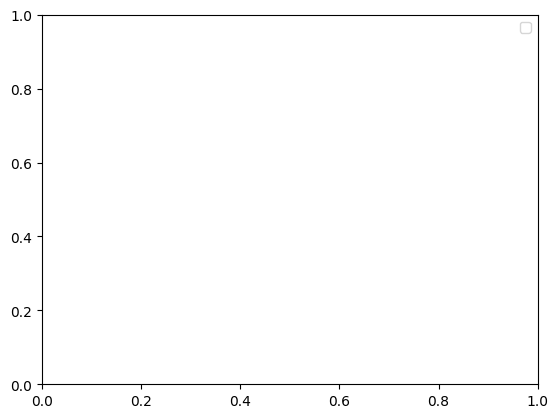

<Figure size 640x480 with 0 Axes>

In [11]:
gp = sample_time_frame_df.groupby(['ID'])

plt.figure()
for name, group in gp:
    plt.plot(group.iloc[:, 4:].median().to_numpy(), label=name)
plt.legend()
plt.show()


plt.figure()
for i, (name, group) in enumerate(gp):
    plt.subplot(len(gp),1,i+1)
    plt.ylim((-4, 2))
    for j in range(len(group)):
        plt.plot(group.iloc[j, 4:].values, alpha=0.2, c='b')
plt.show()

In [96]:
# Last Two weeks data
start_date = '2018-10-25'
end_date = '2018-11-08'

time_frame_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
time_frame_df.groupby(['Location', 'Website']).size().reset_index(name='Counts').describe()

# 46 samples per each website minimum available
time_frame_undersampled_df = undersample(time_frame_df, 46)


/tmp/ipykernel_214785/3286448943.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  undersampled_df = grouped_df.apply(lambda x: x.sample(min(sample_size, len(x)))).reset_index(drop=True)


In [97]:
time_frame_undersampled_df.drop(columns=['Date', 'ID']).to_csv("../dataset/processed/LOC1-LOC2-scaled-balanced-10-25-to-11-08.csv", index=False)

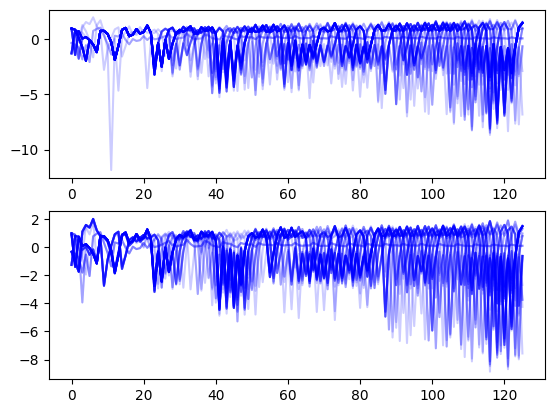

In [109]:
# Different locations of the same time frame
import random
df = pd.read_csv("../dataset/processed/LOC1-LOC2-scaled-balanced-10-25-to-11-08.csv")

selected_website = random.sample(list(df.Website.unique()), 1)[0]
selected_df = df[df['Website'] == 8]
gp = selected_df.groupby('Location')

plt.figure()
for i, (location, data) in enumerate(gp):
    plt.subplot(2, 1, i+1)
    for j in range(len(data)):
        plt.plot(data.iloc[j, 2:].values, c='b', alpha=0.2)